In [16]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('selected_features_without_text.csv')

In [3]:
df = df.drop(columns=["Unnamed: 0","reviewID", "restaurantID"])

In [4]:
df.columns

Index(['reviewerID', 'flagged', 'reviewerFriendCount', 'reviewerNumReviews',
       'reviewerUsefulCount', 'resReviewCount', 'resRating',
       'date_diff_joinedandreviewed', 'Num_Punc', 'adj_count', 'polarity',
       'subjectivity', 'main_topic', 'reviewRating_1', 'reviewRating_2',
       'reviewRating_3', 'reviewRating_4', 'reviewRating_5'],
      dtype='object')

In [5]:
X = df.drop(['flagged'], axis=1) 
y = df.flagged

In [6]:
from sklearn.model_selection import GroupShuffleSplit

splitter = GroupShuffleSplit(test_size=0.2, n_splits=1, random_state=42)
split = splitter.split(X, groups=X['reviewerID'])
train_inds, test_inds = next(split)

X_train = X.iloc[train_inds]
X_test = X.iloc[test_inds]
y_train = y.iloc[train_inds]
y_test = y.iloc[test_inds]

In [7]:
X_train = X_train.drop(['reviewerID'], axis = 1)

In [8]:
X_test = X_test.drop(['reviewerID'], axis = 1)

In [9]:
X_train

,reviewerFriendCount,reviewerNumReviews,reviewerUsefulCount,resReviewCount,resRating,date_diff_joinedandreviewed,Num_Punc,adj_count,polarity,subjectivity,main_topic,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5
1,0.000000,0.001149,0.000000,841,4.5,0.183244,0.031250,0.068376,0.466667,0.566667,0.263158,False,False,False,False,True
2,0.000425,0.003831,0.000276,841,4.5,0.565800,0.028125,0.042735,0.413333,0.720000,0.473684,False,False,True,False,False
3,0.017850,0.022605,0.001609,841,4.5,0.689365,0.262500,0.290598,0.120548,0.535201,0.868421,False,False,True,False,False
4,0.070761,0.462835,0.075869,841,4.5,0.725708,0.090625,0.170940,0.167460,0.564683,0.868421,False,False,False,False,True
5,0.012537,0.020307,0.003127,841,4.5,0.430375,0.234375,0.324786,0.177801,0.458819,0.868421,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26947,0.006162,0.009962,0.001885,18,4.5,0.222265,0.137500,0.085470,0.236429,0.519524,0.763158,False,False,False,False,True
26949,0.002125,0.003065,0.000368,14,4.0,0.170620,0.015625,0.034188,0.460000,0.490000,0.342105,False,False,False,False,True
26951,0.006587,0.062835,0.009242,14,4.0,0.553175,0.050000,0.051282,0.226623,0.760173,0.763158,False,False,False,True,False
26952,0.001275,0.003831,0.000322,15,4.0,0.598317,0.053125,0.076923,0.269271,0.608333,0.894737,False,False,False,False,True


In [10]:
X_test

,reviewerFriendCount,reviewerNumReviews,reviewerUsefulCount,resReviewCount,resRating,date_diff_joinedandreviewed,Num_Punc,adj_count,polarity,subjectivity,main_topic,reviewRating_1,reviewRating_2,reviewRating_3,reviewRating_4,reviewRating_5
0,0.002337,0.018008,0.001885,841,4.5,0.415838,0.446875,0.427350,1.391395e-01,0.528655,0.868421,False,False,False,False,True
8,0.007012,0.079693,0.011403,841,4.5,0.660291,0.368750,0.282051,1.818329e-01,0.542510,0.868421,False,False,False,False,True
12,0.005100,0.000766,0.000414,841,4.5,0.529457,0.418750,0.521368,1.206101e-01,0.484375,0.868421,False,False,False,False,True
25,0.002762,0.031418,0.001747,841,4.5,0.138485,0.150000,0.128205,2.605442e-01,0.500340,0.105263,False,False,False,False,True
34,0.014450,0.050192,0.007081,841,4.5,0.217674,0.184375,0.299145,2.763492e-01,0.638016,0.894737,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26944,0.001912,0.014943,0.001885,19,4.5,0.097552,0.056250,0.094017,1.901042e-01,0.682986,0.736842,False,False,False,True,False
26948,0.002762,0.018008,0.001977,14,4.0,0.232976,0.012500,0.008547,8.000000e-01,0.750000,0.342105,False,False,True,False,False
26950,0.011475,0.011111,0.001150,13,4.5,0.247896,0.106250,0.213675,2.019913e-01,0.659586,0.105263,False,False,False,False,True
26953,0.002762,0.018391,0.002667,16,4.0,0.008416,0.025000,0.042735,-1.190476e-01,0.588095,0.263158,False,False,True,False,False


### Get Model Results Function 

In [11]:
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

def evaluate(clf, X_train, X_test, y_train, y_test): 
    for i in range(2):
        if i == 0:
            print("\n===== Performance on Training Set =====\n")
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_train)
            # Confusion matrix
            cmn = metrics.confusion_matrix(y_train, y_pred, normalize='true') 
            sns.heatmap(cmn, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=["Fraud", "Not Fraud"], yticklabels=["Fraud", "Not Fraud"])
            plt.title("Confusion Matrix")
            plt.ylabel("Actual")
            plt.xlabel("Predicted")
            plt.show()
            print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_train, y_pred)))
            print(metrics.classification_report(y_train, y_pred)) 
            y_pred_proba_model = clf.predict_proba(X_train)[::, 1]
            fpr_train, tpr_train, _ = metrics.roc_curve(y_train, y_pred_proba_model)
            auc_train = metrics.roc_auc_score(y_train, y_pred_proba_model)
        else:
            print("\n===== Performance on Testing Set =====\n")
            model_name = type(clf).__name__
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            # Confusion matrix
            cmn = metrics.confusion_matrix(y_test, y_pred, normalize='true')
            sns.heatmap(cmn, annot=True, fmt=".2f", cmap="coolwarm", xticklabels=["Fraud", "Not Fraud"], yticklabels=["Fraud", "Not Fraud"])
            plt.title("Confusion Matrix")
            plt.ylabel("Actual")
            plt.xlabel("Predicted")
            plt.show()
            print('Accuracy = {:.5f}'.format(metrics.accuracy_score(y_test, y_pred))) 
            print(metrics.classification_report(y_test, y_pred))
            y_pred_proba_model = clf.predict_proba(X_test)[::, 1]
            fpr_test, tpr_test, _ = metrics.roc_curve(y_test, y_pred_proba_model)
            auc_test = metrics.roc_auc_score(y_test, y_pred_proba_model)
            
    # Plot ROC curve for both training and testing sets
    plt.figure(figsize=(8, 5))
    plt.plot(fpr_train, tpr_train, label="Training Set AUC: {:.2f}".format(auc_train))
    plt.plot(fpr_test, tpr_test, label="Testing Set AUC: {:.2f}".format(auc_test))
    plt.legend(loc=4, title='Models', facecolor='white')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC', size=15)
    plt.show()


### Logistic Regression


===== Performance on Training Set =====



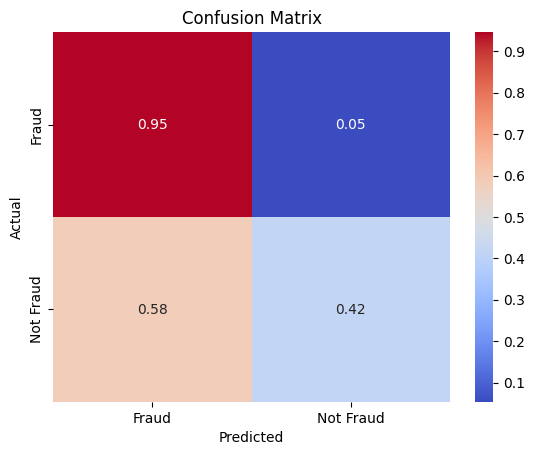

Accuracy = 0.82295
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16467
           1       0.70      0.42      0.52      5007

    accuracy                           0.82     21474
   macro avg       0.77      0.68      0.71     21474
weighted avg       0.81      0.82      0.81     21474


===== Performance on Testing Set =====



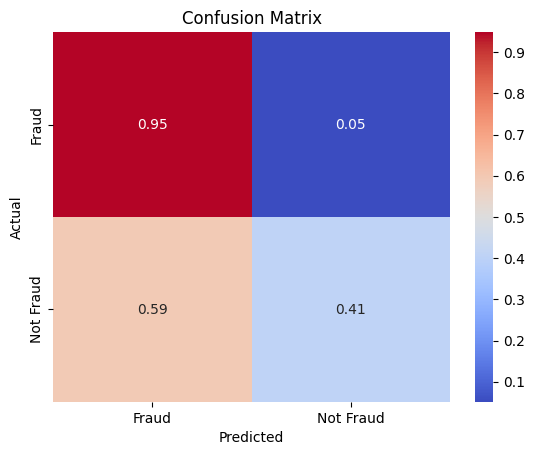

Accuracy = 0.82999
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      4285
           1       0.69      0.41      0.51      1197

    accuracy                           0.83      5482
   macro avg       0.77      0.68      0.70      5482
weighted avg       0.82      0.83      0.81      5482



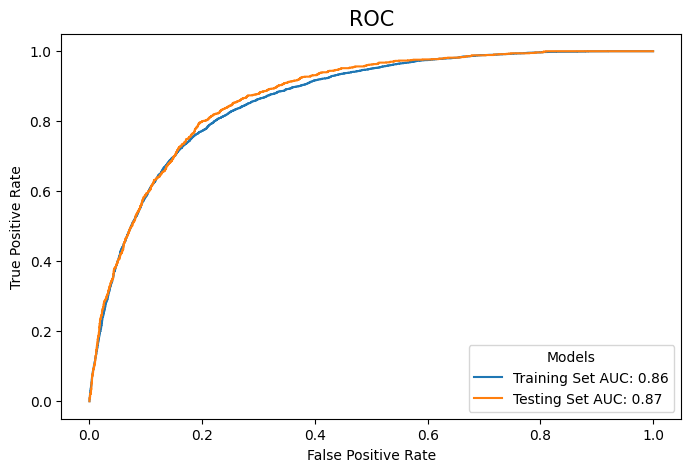

In [14]:
logit_model = LogisticRegression(max_iter=10000)
evaluate(logit_model, X_train, X_test, y_train, y_test)

In [18]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2']}

/Users/luyifan/Desktop/BT4012_Reviews/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/luyifan/Desktop/BT4012_Reviews/.venv/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/luyifan/Desktop/BT4012_Reviews/.venv/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/luyifan/Desktop/BT4012_Reviews/.venv/lib/python3.10/site-package


===== Performance on Training Set =====



/Users/luyifan/Desktop/BT4012_Reviews/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


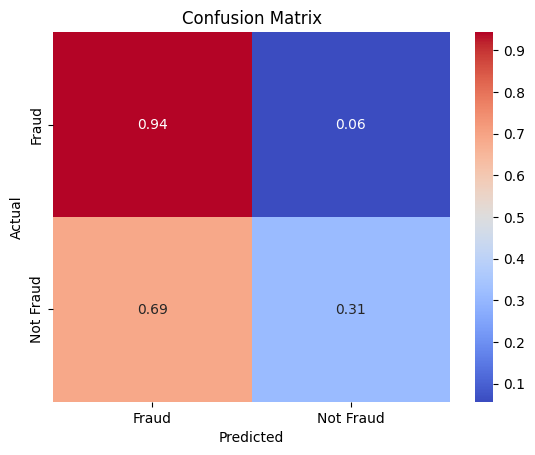

Accuracy = 0.79603
              precision    recall  f1-score   support

           0       0.82      0.94      0.88     16467
           1       0.63      0.31      0.42      5007

    accuracy                           0.80     21474
   macro avg       0.72      0.63      0.65     21474
weighted avg       0.77      0.80      0.77     21474


===== Performance on Testing Set =====



/Users/luyifan/Desktop/BT4012_Reviews/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


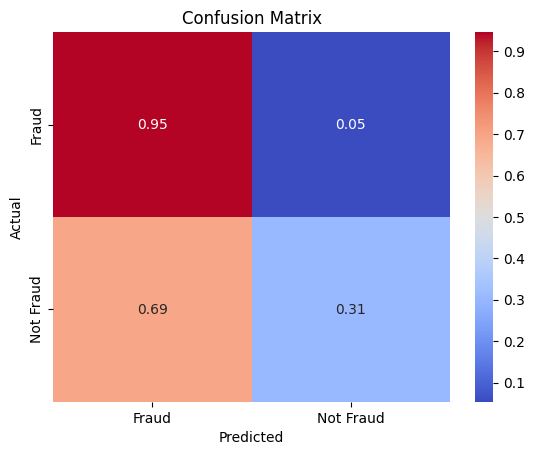

Accuracy = 0.80664
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4285
           1       0.61      0.31      0.41      1197

    accuracy                           0.81      5482
   macro avg       0.72      0.63      0.65      5482
weighted avg       0.78      0.81      0.78      5482



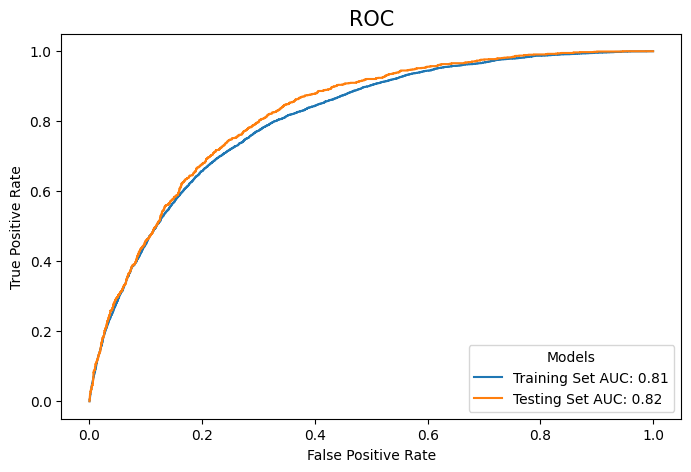

In [19]:
grid_search = GridSearchCV(estimator=logit_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_logreg = LogisticRegression(**best_params)
best_logreg.fit(X_train, y_train)
evaluate(best_logreg, X_train, X_test, y_train, y_test)

## XGBoost

In [14]:
X_train.columns

Index(['reviewerFriendCount', 'reviewerNumReviews', 'reviewerUsefulCount',
       'resReviewCount', 'resRating', 'date_diff_joinedandreviewed',
       'Num_Punc', 'adj_count', 'polarity', 'subjectivity', 'main_topic',
       'reviewRating_1', 'reviewRating_2', 'reviewRating_3', 'reviewRating_4',
       'reviewRating_5'],
      dtype='object')


===== Performance on Training Set =====



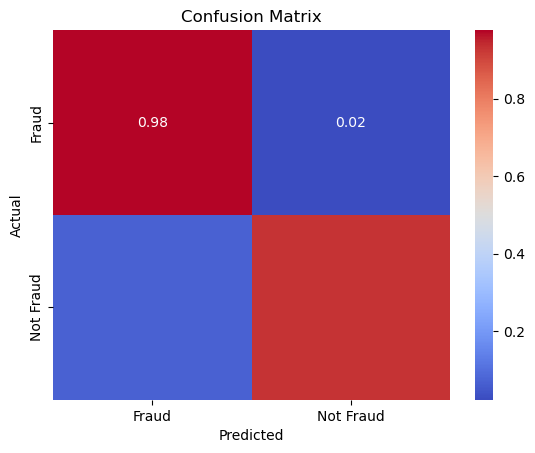

Accuracy = 0.96577
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     16467
           1       0.92      0.93      0.93      5007

    accuracy                           0.97     21474
   macro avg       0.95      0.95      0.95     21474
weighted avg       0.97      0.97      0.97     21474


===== Performance on Testing Set =====



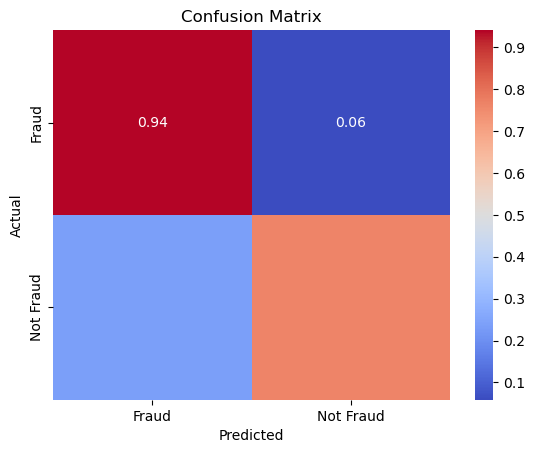

Accuracy = 0.90259
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      4285
           1       0.78      0.76      0.77      1197

    accuracy                           0.90      5482
   macro avg       0.86      0.85      0.86      5482
weighted avg       0.90      0.90      0.90      5482



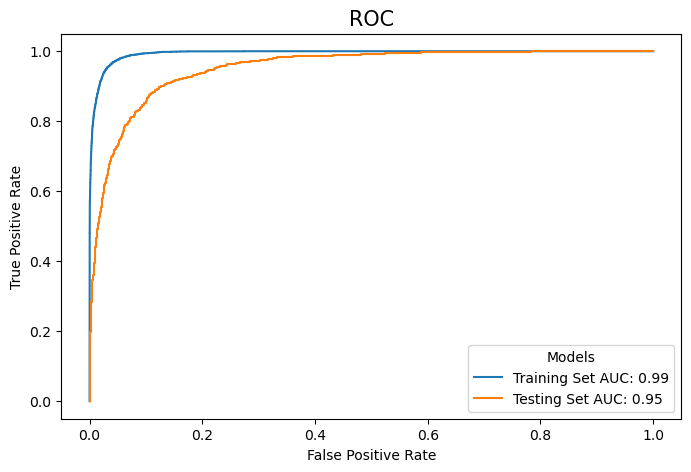

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb_model = XGBClassifier()
evaluate(xgb_model, X_train, X_test, y_train, y_test)


In [16]:
xgb_model = XGBClassifier()
#Define hyperparameters to tune
param_grid = {
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [3, 5, 10, 15],
    'n_estimators': [50, 100, 150],
    'subsample': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 2, 3]
}

# Perform grid search to find best hyperparameters
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring = 'f1')
grid_search.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
print("Best hyperparameters: ", grid_search.best_params_)


Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.6}



===== Performance on Training Set =====



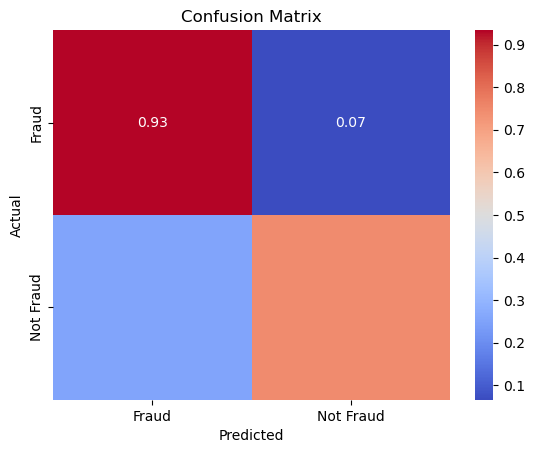

Accuracy = 0.89001
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     16467
           1       0.77      0.75      0.76      5007

    accuracy                           0.89     21474
   macro avg       0.85      0.84      0.84     21474
weighted avg       0.89      0.89      0.89     21474


===== Performance on Testing Set =====



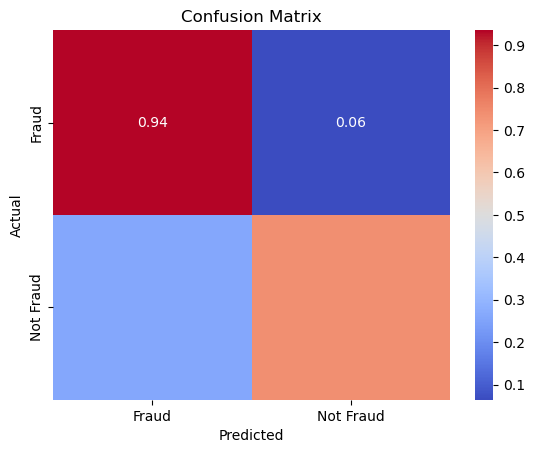

Accuracy = 0.89256
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      4285
           1       0.76      0.74      0.75      1197

    accuracy                           0.89      5482
   macro avg       0.84      0.84      0.84      5482
weighted avg       0.89      0.89      0.89      5482



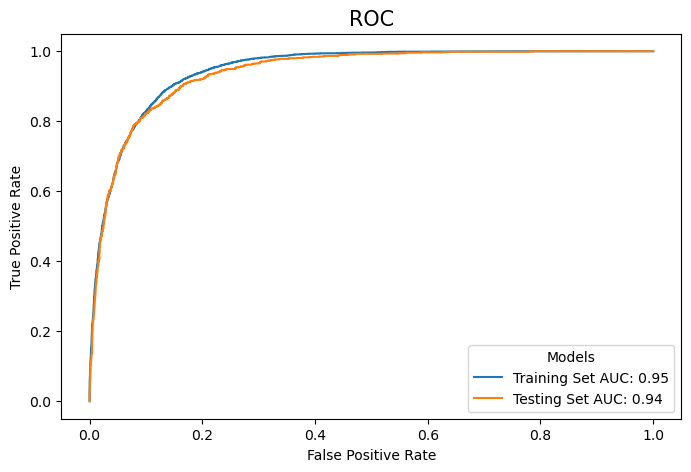

In [18]:
xgboost_best_params = XGBClassifier(**grid_search.best_params_)
xgboost_best_params.fit(X_train, y_train)
evaluate(xgboost_best_params, X_train, X_test, y_train, y_test)


In [ ]:
#xgb model before dropping variables
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV


grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

# Retrain model with best hyperparameters
xgb_best = XGBClassifier(**grid_search.best_params_)
xgb_best.fit(X_train, y_train)

# Evaluate best model
y_pred_xgb = xgb_best.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_precision = precision_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)

print('Accuracy with best hyperparameters: %.2f%%' % (xgb_accuracy * 100.0))
print('F1 Score with best hyperparameters: %.2f%%' % (xgb_f1 * 100.0))
print('Precision with best hyperparameters: %.2f%%' % (xgb_precision * 100.0))
print('Recall with best hyperparameters: %.2f%%' % (xgb_recall * 100.0))


ValueError: 
All the 1620 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1620 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/xgboost/core.py", line 620, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/xgboost/sklearn.py", line 1468, in fit
    ) = self._configure_fit(
        ^^^^^^^^^^^^^^^^^^^^
  File "/Users/admin/opt/anaconda3/envs/ipykernel_py3/lib/python3.11/site-packages/xgboost/sklearn.py", line 892, in _configure_fit
    raise ValueError(
ValueError: Experimental support for categorical data is not implemented for current tree method yet.
